## Bussiness case: To predict whether the patient will have the diabeties or not?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data= pd.read_csv("diabetes1.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Basic checks 
### Exploratory Data analysis
### Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# Checking weather any column has 0 values
data.loc[data['Glucose']==0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [8]:
data.loc[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
data.loc[data['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [10]:
data.loc[data['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# COunting the total number of 0 values in BMI column

data['BMI'].value_counts()[0]

11

In [12]:
data.loc[data['DiabetesPedigreeFunction']==0]    # No 0 values in this column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [13]:
data.loc[data['Age']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [14]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())#replacing 0 with mean of the bmi 
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())#replacing 0 with mean of the Bloodpressure 
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())##replacing 0 with mean of the Glucose
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())#replacing 0 with mean of the Insulin
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())#replacing 0 with mean of the Skinthickness

In [15]:
# To confirm whether all the 0 values in colum are replaced
data[data['Glucose']==0].value_counts().sum()

0

In [16]:
data[data['BloodPressure']==0].value_counts().sum()

0

In [17]:
data[data['SkinThickness']==0].value_counts().sum()

0

In [18]:
data[data['Insulin']==0].value_counts().sum()

0

In [19]:
data[data['BMI']==0].value_counts().sum()

0

###  Analysis of continous variable with target variable

In [25]:
data2= data[['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

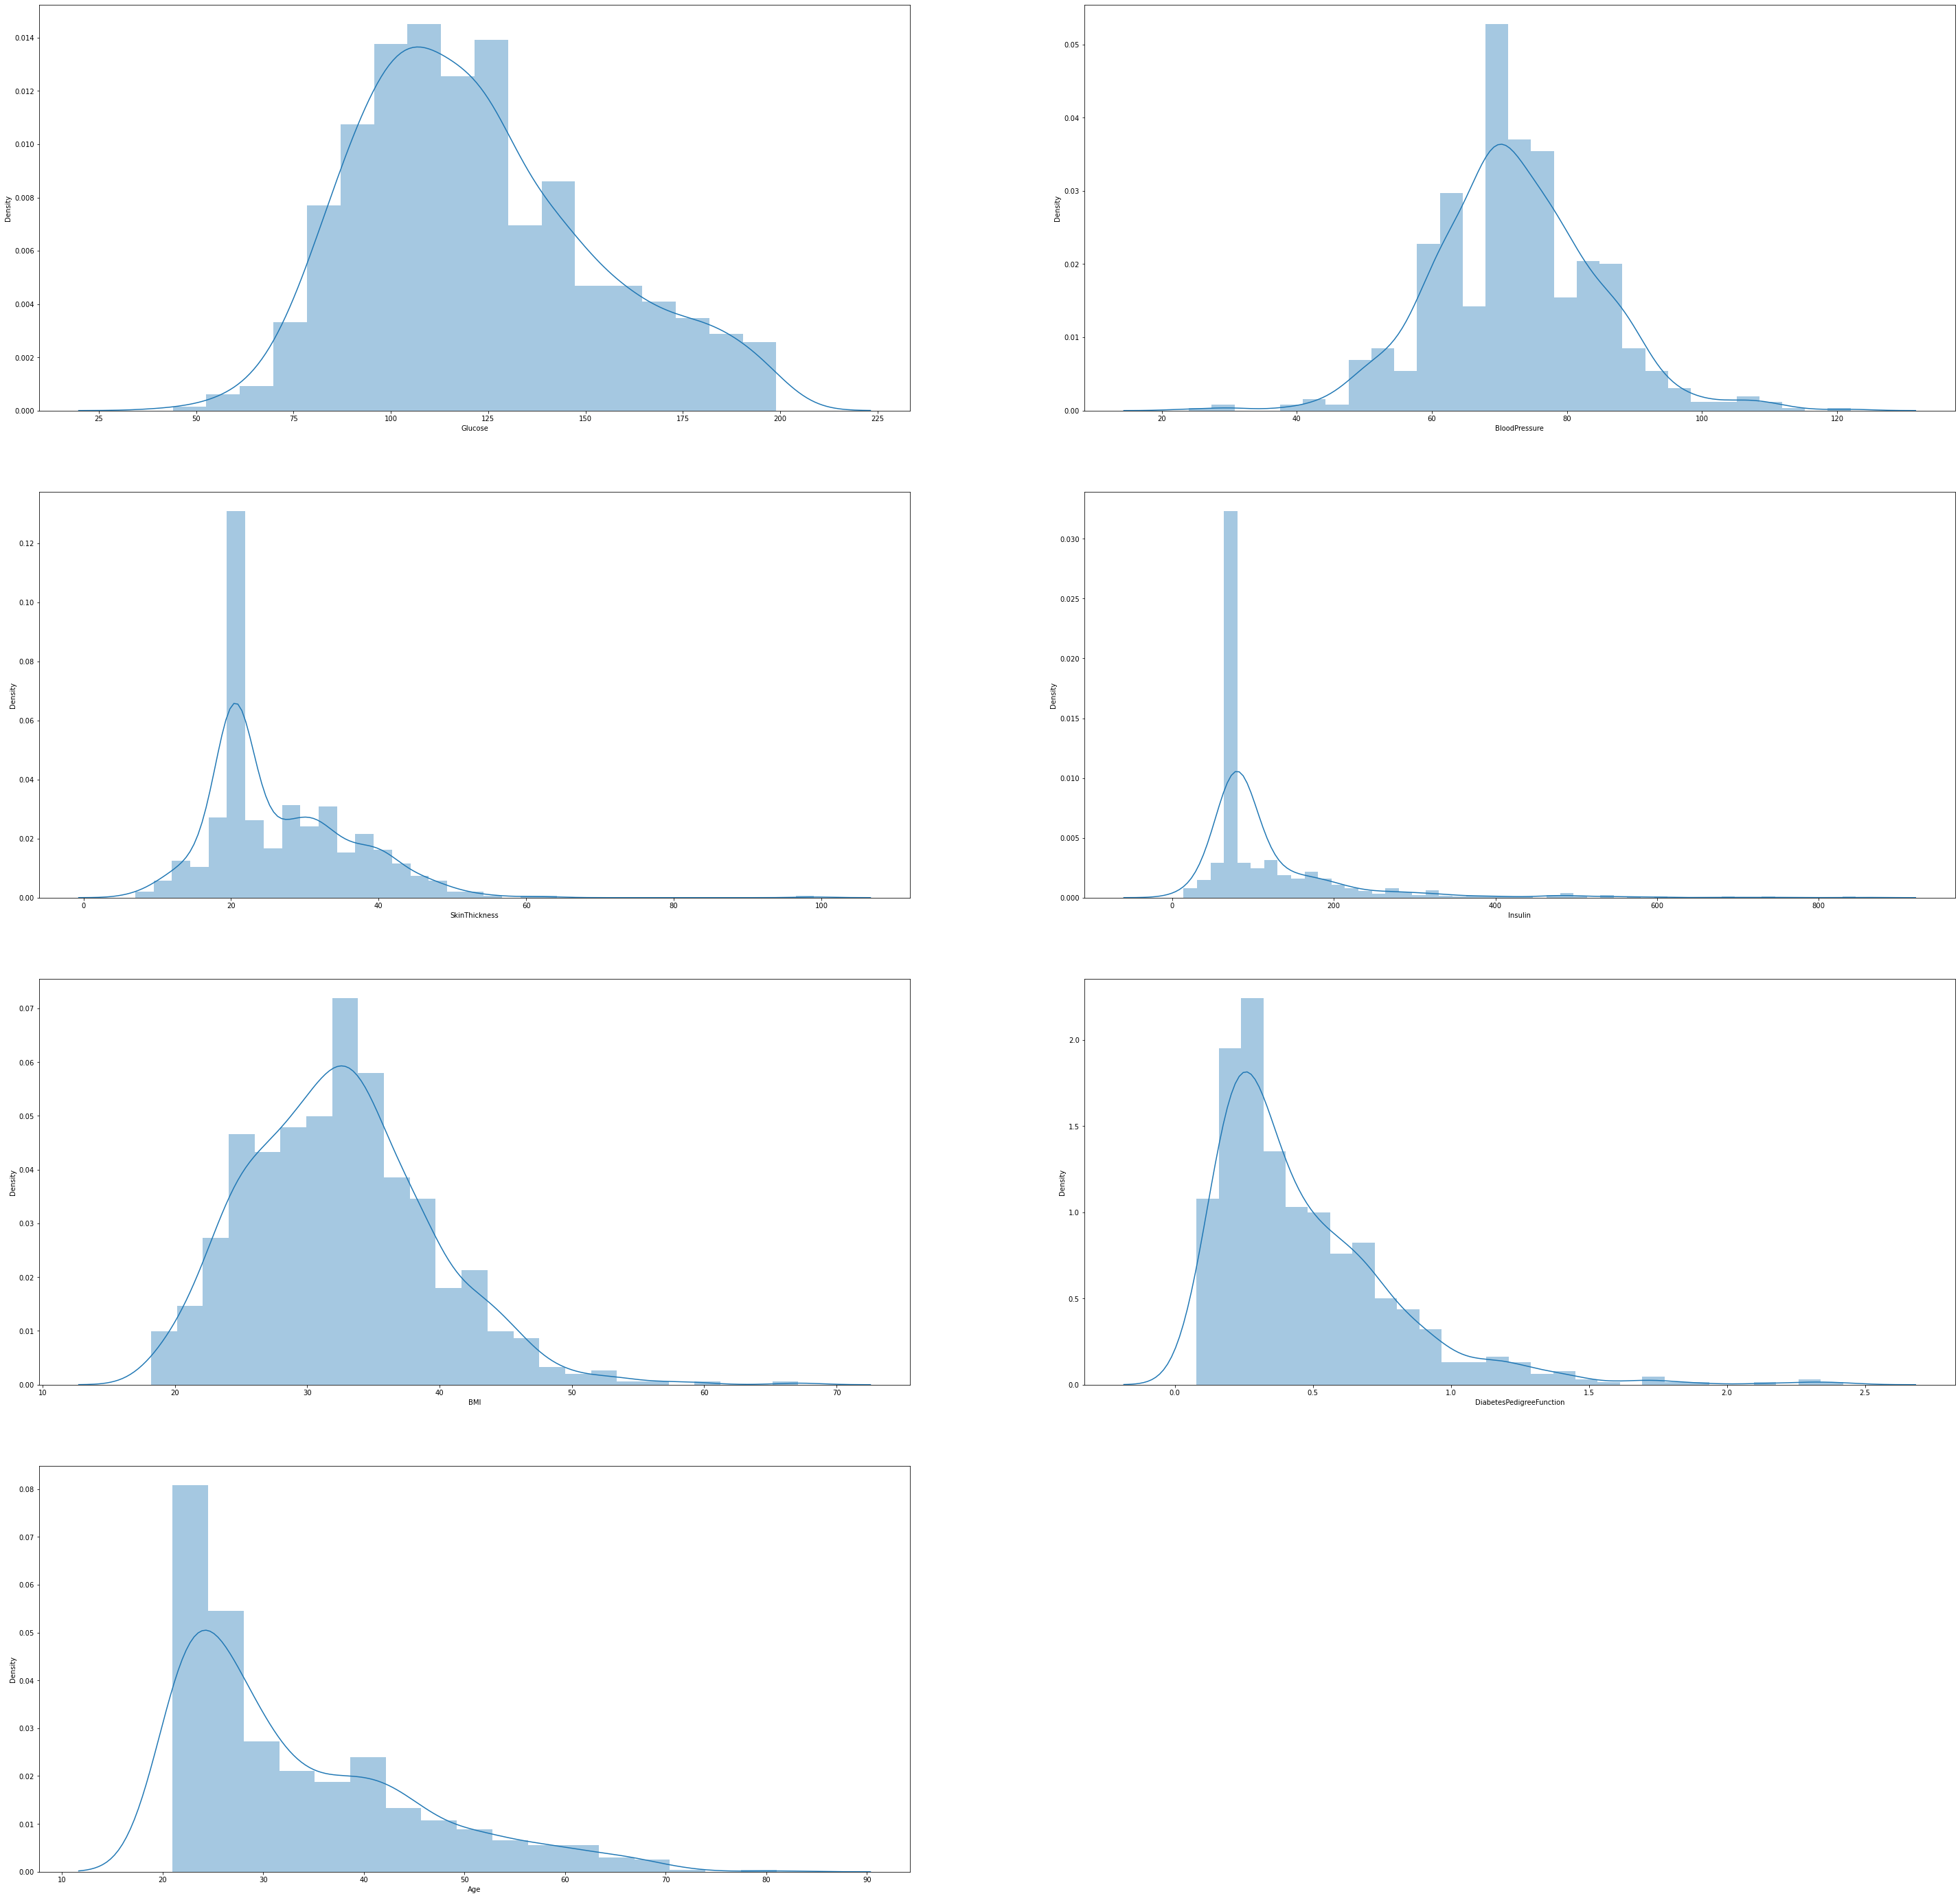

<Figure size 432x288 with 0 Axes>

In [26]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(50,50),facecolor='white')#canvas size

plotnum=1 #counter

for c in data2:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(data2[c])#to know distribution
    plotnum+=1#increment counter
plt.show()
plt.tight_layout()    

## Checking Outliers

In [30]:
Box= data[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]

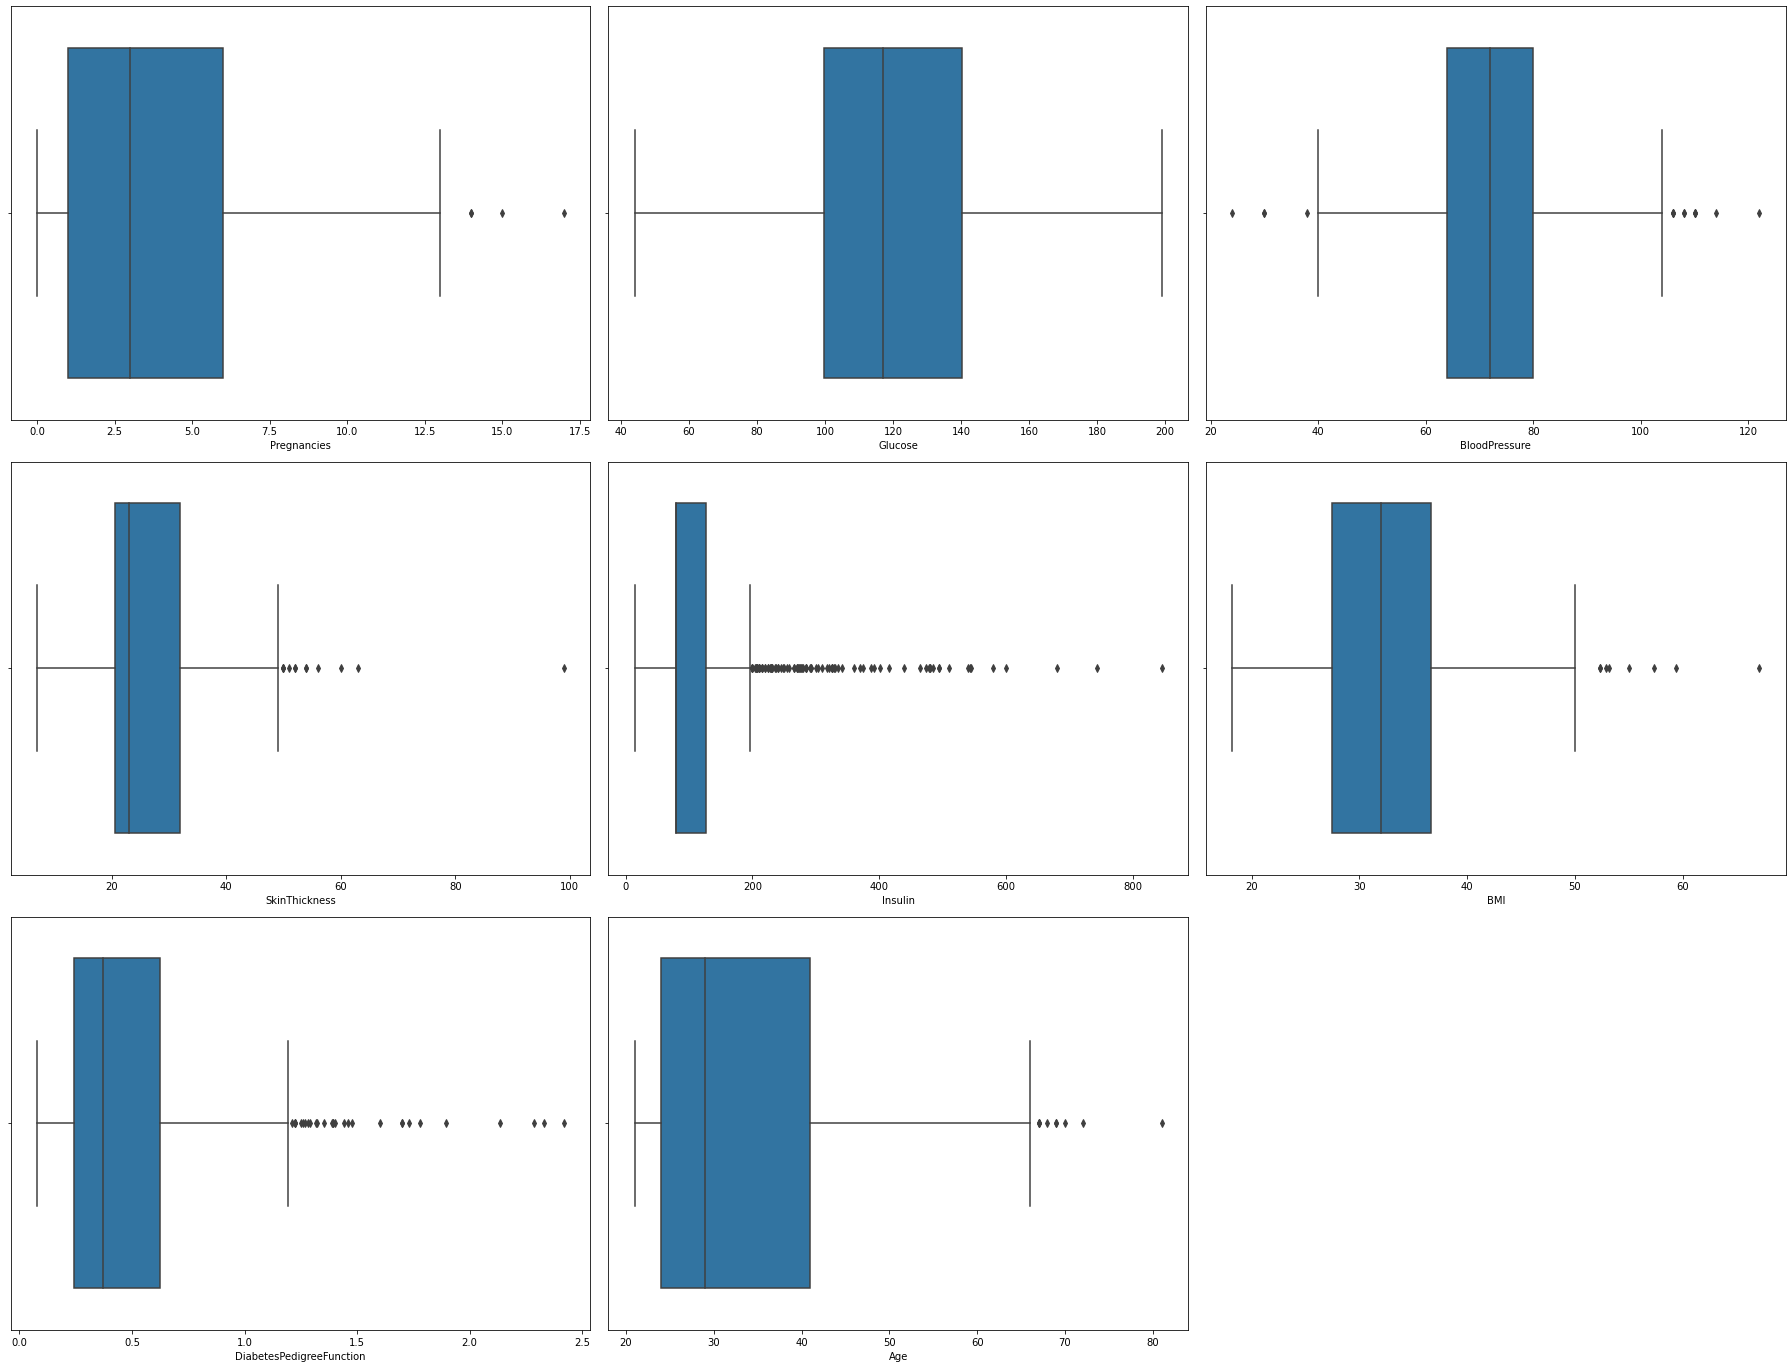

In [31]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in Box:
    if(plotnum<14):
        ax=plt.subplot(4,3,plotnum)
        sns.boxplot(Box[c])
    plotnum+=1
plt.tight_layout()    

## Handling Outliers

### Pregnancies- As pregnancies is a categorical variable so relace the outliers with its mode

In [32]:
data.value_counts('Pregnancies')

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
dtype: int64

In [34]:
lower_limit= data.Pregnancies.mean()-3* data.Pregnancies.std()
print(lower_limit)

upper_limit= data.Pregnancies.mean()+3*data.Pregnancies.std()
print(upper_limit)

-6.263682104763253
13.953786271429921


In [35]:
data.loc[data["Pregnancies"]<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [37]:
data.loc[data["Pregnancies"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.000000,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.000000,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.000000,36.6,0.412,46,1
455,14,175.0,62.0,30.0,79.799479,33.6,0.212,38,1


In [40]:
# Imputing outliers with mode value as Pregnancies is a categorical variable
data['Pregnancies']=data["Pregnancies"].replace([14,15,17],1)

In [39]:
data.loc[data["Pregnancies"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### BllodPressure- this is a normally distributed so we use 3 sigma rule

In [46]:
from scipy import stats

In [47]:
data.sort_values("BloodPressure")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
597,1,89.0,24.0,19.000000,25.000000,27.8,0.559,21,0
18,1,103.0,30.0,38.000000,83.000000,43.3,0.183,33,0
125,1,88.0,30.0,42.000000,99.000000,55.0,0.496,26,1
599,1,109.0,38.0,18.000000,120.000000,23.1,0.407,26,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
549,4,189.0,110.0,31.000000,79.799479,28.5,0.680,37,0
43,9,171.0,110.0,24.000000,240.000000,45.4,0.721,54,1
177,0,129.0,110.0,46.000000,130.000000,67.1,0.319,26,1
691,13,158.0,114.0,20.536458,79.799479,42.3,0.257,44,1


In [49]:
lower_limit=data.BloodPressure.mean() - 3*data.BloodPressure.std()##calculating lower limit
print(lower_limit)

upper_limit=data.BloodPressure.mean() + 3*data.BloodPressure.std()#calculating upper limit
upper_limit

35.90701172379312


108.60260131331626

In [50]:
data.loc[data["BloodPressure"]<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0


In [51]:
data.loc[data["BloodPressure"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171.0,110.0,24.000000,240.000000,45.4,0.721,54,1
106,1,96.0,122.0,20.536458,79.799479,22.4,0.207,27,0
177,0,129.0,110.0,46.000000,130.000000,67.1,0.319,26,1
549,4,189.0,110.0,31.000000,79.799479,28.5,0.680,37,0
691,13,158.0,114.0,20.536458,79.799479,42.3,0.257,44,1


In [52]:
data.loc[data["BloodPressure"]<lower_limit, 'BloodPressure']= np.mean(data.BloodPressure)

In [53]:
data.loc[data["BloodPressure"]<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [54]:
data.loc[data["BloodPressure"]>upper_limit, 'BloodPressure']= np.mean(data.BloodPressure)

In [55]:
data.loc[data["BloodPressure"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## SkinThickness-- There is skewness in data so we will replace outliers with median

In [56]:
IQR = stats.iqr(data.SkinThickness, interpolation = 'midpoint') 

IQR

11.463541666666668

In [57]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = data.SkinThickness.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.SkinThickness.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [58]:
min_limit

3.341145833333332

In [59]:
max_limit

49.1953125

In [60]:
data.loc[data["SkinThickness"]<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [61]:
data.loc[data["SkinThickness"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.000000,46.8,0.962,31,0
86,13,106.0,72.0,54.0,79.799479,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.000000,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
150,1,136.0,74.0,50.0,204.000000,37.4,0.399,24,0
211,0,147.0,85.0,54.0,79.799479,42.8,0.375,24,0
273,1,71.0,78.0,50.0,45.000000,33.2,0.422,21,0
275,2,100.0,70.0,52.0,57.000000,40.5,0.677,25,0
445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1
532,1,86.0,66.0,52.0,65.000000,41.3,0.917,29,0


In [62]:
data.loc[data["SkinThickness"]>max_limit, 'SkinThickness']= np.median(data.SkinThickness)

In [63]:
data.loc[data["SkinThickness"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Insulin-- There is skewness in data so we will replace outliers wih ite median

In [64]:
IQR = stats.iqr(data.Insulin, interpolation = 'midpoint') 

IQR

47.70052083333333

In [65]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = data.Insulin.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.Insulin.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [66]:
min_limit

8.248697916666671

In [67]:
max_limit

198.80078125

In [68]:
data.loc[data["Insulin"]<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [69]:
data.loc[data["Insulin"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
31,3,158.0,76.0,36.0,245.0,31.6,0.851,28,1
...,...,...,...,...,...,...,...,...,...
713,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0
715,7,187.0,50.0,33.0,392.0,33.9,0.826,34,1
721,1,114.0,66.0,36.0,200.0,38.1,0.289,21,0
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1


In [70]:
data.loc[data["Insulin"]>max_limit, 'Insulin']= np.median(data.Insulin)

In [71]:
data.loc[data["Insulin"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## BMI-- It is a normal distributed data so we use 3 sigma rule

In [72]:
data.sort_values('BMI')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
438,1,97.0,70.000000,15.000000,79.799479,18.2,0.147,21,0
418,1,83.0,68.000000,20.536458,79.799479,18.2,0.624,27,0
526,1,97.0,64.000000,19.000000,82.000000,18.2,0.299,21,0
239,0,104.0,76.000000,20.536458,79.799479,18.4,0.582,27,0
90,1,80.0,55.000000,20.536458,79.799479,19.1,0.258,21,0
...,...,...,...,...,...,...,...,...,...
120,0,162.0,76.000000,23.000000,100.000000,53.2,0.759,25,1
125,1,88.0,72.254807,42.000000,99.000000,55.0,0.496,26,1
673,3,123.0,100.000000,35.000000,79.799479,57.3,0.880,22,0
445,0,180.0,78.000000,23.000000,14.000000,59.4,2.420,25,1


In [73]:
lower_limit=data.BMI.mean() - 3*data.BMI.std()##calculating lower limit
print(lower_limit)

upper_limit=data.BMI.mean() + 3*data.BMI.std()#calculating upper limit
upper_limit

11.824684633181015


53.07692567769133

In [74]:
data.loc[data["BMI"]<lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [75]:
data.loc[data["BMI"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.000000,23.0,100.000000,53.2,0.759,25,1
125,1,88.0,72.254807,42.0,99.000000,55.0,0.496,26,1
177,0,129.0,72.427677,46.0,130.000000,67.1,0.319,26,1
445,0,180.0,78.000000,23.0,14.000000,59.4,2.420,25,1
673,3,123.0,100.000000,35.0,79.799479,57.3,0.880,22,0


In [76]:
data.loc[data["BMI"]>upper_limit, 'BMI']= np.mean(data.BMI)

In [77]:
data.loc[data["BMI"]>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## DiabetesPedigreeFunction-- There is skewness in data so we will replace outliers with median

In [85]:
IQR = stats.iqr(data.DiabetesPedigreeFunction, interpolation = 'midpoint') 

IQR

0.38300000000000006

In [79]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = data.DiabetesPedigreeFunction.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.DiabetesPedigreeFunction.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [80]:
min_limit

-0.3307500000000001

In [81]:
max_limit

1.2007500000000002

In [83]:
data.loc[data["DiabetesPedigreeFunction"]<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [84]:
data.loc[data["DiabetesPedigreeFunction"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.000000,168.000000,43.100000,2.288,33,1
12,10,139.0,80.0,20.536458,79.799479,27.100000,1.441,57,0
39,4,111.0,72.0,47.000000,79.799479,37.100000,1.390,56,1
45,0,180.0,66.0,39.000000,79.799479,42.000000,1.893,25,1
58,0,146.0,82.0,20.536458,79.799479,40.500000,1.781,44,0
100,1,163.0,72.0,20.536458,79.799479,39.000000,1.222,33,1
147,2,106.0,64.0,35.000000,119.000000,30.500000,1.400,34,0
187,1,128.0,98.0,41.000000,58.000000,32.000000,1.321,33,1
218,5,85.0,74.0,22.000000,79.799479,29.000000,1.224,32,1
228,4,197.0,70.0,39.000000,79.799479,36.700000,2.329,31,0


In [86]:
data.loc[data["DiabetesPedigreeFunction"]>max_limit, 'DiabetesPedigreeFunction']= np.median(data.DiabetesPedigreeFunction)

In [87]:
data.loc[data["DiabetesPedigreeFunction"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Age-- There is skewness in data so we will replace outliers with median

In [88]:
IQR = stats.iqr(data.Age, interpolation = 'midpoint') 

IQR

17.0

In [89]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = data.Age.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.Age.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [90]:
min_limit

-1.5

In [91]:
max_limit

66.5

In [92]:
data.loc[data["Age"]<min_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [93]:
data.loc[data["Age"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.000000,20.536458,79.799479,26.800000,0.186,69,0
363,4,146.0,78.000000,20.536458,79.799479,38.500000,0.520,67,1
453,2,119.0,69.105469,20.536458,79.799479,19.600000,0.832,72,0
459,9,134.0,74.000000,33.000000,60.000000,25.900000,0.460,81,0
489,8,194.0,80.000000,20.536458,79.799479,26.100000,0.551,67,0
537,0,57.0,60.000000,20.536458,79.799479,21.700000,0.735,67,0
666,4,145.0,82.000000,18.000000,79.799479,32.500000,0.235,70,1
674,8,91.0,82.000000,20.536458,79.799479,35.600000,0.587,68,0
684,5,136.0,82.000000,20.536458,79.799479,31.992578,0.640,69,0


In [94]:
data.loc[data["Age"]>max_limit, 'Age']= np.median(data.Age)

In [95]:
data.loc[data["Age"]>max_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Now our data has no Null values and NO 0 values

In [96]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.6270,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.3510,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.6720,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.1670,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,0.3725,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.1710,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.3400,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.2450,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.3490,47,1


In [97]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.772135,121.681605,72.162232,26.066115,90.148644,32.281865,0.427667,32.760417,0.348958
std,3.276307,30.436016,11.314811,8.658949,32.086452,6.534579,0.245162,11.055385,0.476951
min,0.000000,44.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,84.250000,36.425000,0.582250,40.000000,1.000000
max,13.000000,199.000000,108.000000,49.000000,196.000000,52.900000,1.191000,66.000000,1.000000


In [98]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=scale.fit_transform(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [99]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.485714,0.666667,0.361536,0.443804,0.493261,0.644444,1
1,0.076923,0.264516,0.400000,0.523810,0.361536,0.242075,0.245283,0.222222,0
2,0.615385,0.896774,0.371429,0.322297,0.361536,0.146974,0.533693,0.244444,1
3,0.076923,0.290323,0.400000,0.380952,0.439560,0.285303,0.079964,0.000000,0
4,0.000000,0.600000,0.028571,0.666667,0.846154,0.717579,0.264600,0.266667,1


## Feature Selection

In [100]:
corr_data= data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

<AxesSubplot:>

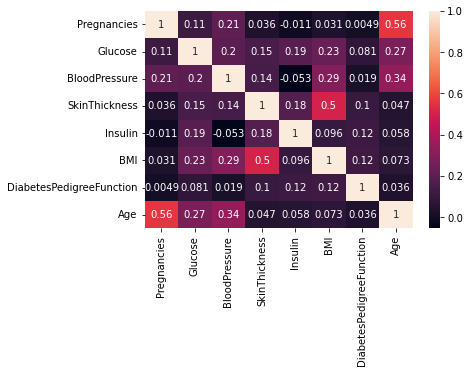

In [101]:
sns.heatmap(corr_data.corr(),annot=True)

In [102]:
## There is no relationship among the columns 


In [103]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.290164,0.501172,0.488032,0.453955,0.418399,0.405817,0.314167,0.261343,0.348958
std,0.252024,0.196361,0.161640,0.206165,0.176299,0.188316,0.220272,0.245675,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.359677,0.371429,0.322297,0.361536,0.268012,0.148922,0.066667,0.000000
50%,0.230769,0.470968,0.485714,0.380952,0.361536,0.397695,0.263926,0.177778,0.000000
75%,0.461538,0.620968,0.600000,0.595238,0.385989,0.525216,0.453055,0.422222,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
data.duplicated().sum()

0

In [105]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Model creation

In [106]:
X= data.iloc[:,1:-1]
Y= data.Outcome

In [107]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

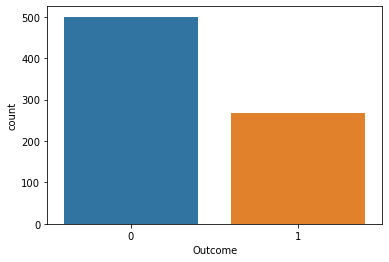

In [108]:
sns.countplot(Y);

In [109]:
# Balencing the data

from imblearn.over_sampling import SMOTE
smote= SMOTE()

In [110]:
X_smote, Y_smote= smote.fit_resample(X,Y)

In [111]:
from collections import Counter
print('Actual classes', Counter(Y))
print('Smote classes',Counter(Y_smote))

Actual classes Counter({0: 500, 1: 268})
Smote classes Counter({1: 500, 0: 500})


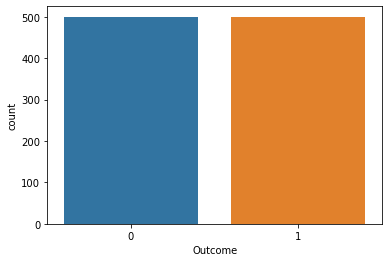

In [112]:
sns.countplot(Y_smote);

### Now we have balenced data so lets train and test the model

In [113]:
## Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_smote, Y_smote, random_state=3)

In [114]:
# Support vector classifier model

from sklearn.svm import SVC
svclassifier= SVC()
svclassifier.fit(X_train,Y_train)

SVC()

In [115]:
#Predict output for X_test

Y_hat= svclassifier.predict(X_test)
Y_hat

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [116]:
# Evaluating the model created

from sklearn.metrics import accuracy_score, classification_report, f1_score
acc= accuracy_score(Y_test, Y_hat)
acc

0.788

In [117]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       118
           1       0.78      0.83      0.81       132

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [118]:
f1= f1_score(Y_test,Y_hat)
f1

0.8058608058608059

In [119]:
sclassifier= SVC(kernel="linear")
sclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [120]:
Y_pred= sclassifier.predict(X_test)

In [121]:
f1_score(Y_test,Y_pred)

0.7626459143968871

In [122]:
sclassifier= SVC(kernel="poly")
sclassifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [123]:
Y_p= sclassifier.predict(X_test)
f1_score(Y_test,Y_p)

0.7338709677419355

In [124]:
# Checking cross validation score

from sklearn.model_selection import cross_val_score

scores= cross_val_score(svclassifier,X,Y, cv=2, scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean()) 
print("Std :",scores.std())

[0.59591837 0.64166667]
Cross validation Score: 0.6187925170068027
Std : 0.02287414965986395


In [125]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
             
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.753 total time=   0.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.0s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.774 total time=   0.0s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.361 total time=   0.0s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.369 total time=   0.0s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.452 total time=   0.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.000 total time=   0.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [126]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1}
SVC(C=10, gamma=1, random_state=42)


In [127]:
clf=SVC(C=10, gamma=1,random_state=42)

In [128]:
clf.fit(X_train, Y_train)

SVC(C=10, gamma=1, random_state=42)

In [129]:
Y_clf=clf.predict(X_test)

In [130]:
print(classification_report(Y_test,Y_clf))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       118
           1       0.77      0.84      0.80       132

    accuracy                           0.78       250
   macro avg       0.79      0.78      0.78       250
weighted avg       0.79      0.78      0.78       250



In [131]:
f1=f1_score(Y_test,Y_clf)
f1

0.8043478260869567

In [132]:
scores_after = cross_val_score(clf,X,Y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())

[0.67816092 0.55900621 0.67515924]
Cross validation Score: 0.6374421221297145
Std : 0.02287414965986395
